In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Load dataset

In [4]:
df = pd.read_csv('./Dataset/Train.csv')

In [5]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [6]:
data = df.values

x = data[:, :-1]
y = data[:, -1]

print(x.shape, y.shape)

(1600, 5) (1600,)


In [7]:
# Normalise

u = np.mean(x, axis = 0)
std = np.std(x, axis = 0)

x = (x - u)/std

## Linear Regression on Multiple Features

In [9]:
print(x.shape, y.shape)

(1600, 5) (1600,)


In [10]:
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
print(x.shape)

(1600, 6)


In [12]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [13]:
def error(x, y, theta):
    e = 0.0
    m = x.shape[0]

    y_ = hypothesis(x, theta)
    e = np.sum((y_-y)**2)

    return e/m

In [14]:
def gradient(x, y, theta):
    y_ = hypothesis(x, theta)
    grad = np.dot(x.T, (y_-y))

    return grad/x.shape[0]

In [15]:
def gradientDescent(x, y, learningRate = 0.1, maxIters = 200):
    n = x.shape[1]
    theta = np.zeros((n,))
    errorList = []

    for i in range(maxIters):
        e = error(x, y, theta)
        errorList.append(e)

        grad = gradient(x, y, theta)
        theta = theta - learningRate*grad

    return theta, errorList

In [16]:
theta, errorList = gradientDescent(x, y)

In [17]:
print(theta)

[ 0.31883538 29.59359192 94.65067693  8.37544451 45.52303627  2.4646154 ]


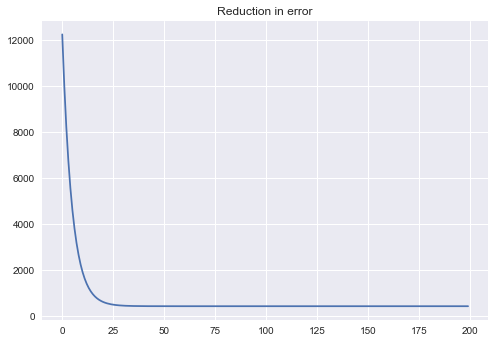

In [21]:
plt.style.use('seaborn')
plt.plot(errorList)
plt.title("Reduction in error")
plt.show()

In [22]:
xTest = pd.read_csv('./Dataset/Test.csv').values

In [24]:
ones = np.ones((xTest.shape[0], 1))
xTest = np.hstack((ones, xTest))

In [27]:
yPredict = hypothesis(xTest, theta)

In [35]:
yPredict[:12]

array([ 112.15168368,  115.87976737,  -25.87626146,  -47.63583955,
       -102.51798172,  -50.2893197 ,  -81.36835964,   20.93713812,
        172.90067153,  170.88408442, -111.39443599,  -25.5961347 ])

## Mini Batch GD

In [41]:
def batchGradientDescent(x, y, learningRate = 0.1, maxIters = 100, batchSize = 20):
    n = x.shape[1]
    theta = np.zeros((n,))
    errorList = []

    data = np.hstack((x, y.reshape(-1, 1)))

    for i in range(maxIters):
        np.random.shuffle(data)
        m = data.shape[0]
        totalBatch = m // batchSize

        for j in range(totalBatch):
            batchData = data[j*batchSize : (j+1)*batchSize, :]
            xBatch = batchData[:, :-1]
            yBatch = batchData[:, -1]
            batchGrad = gradient(xBatch, yBatch, theta)
            theta = theta - learningRate*batchGrad

            e = error(x, y, theta)
            errorList.append(e)

    return theta, errorList

In [42]:
theta, errorList = batchGradientDescent(x, y)

In [43]:
print(theta)

[ 1.75799841 27.88334577 95.322276    6.82315815 44.71800402  2.27307809]


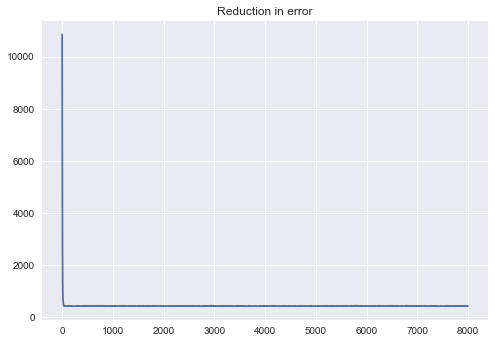

In [44]:
plt.style.use('seaborn')
plt.plot(errorList)
plt.title("Reduction in error")
plt.show()

In [45]:
yPredict = hypothesis(xTest, theta)

In [46]:
yPredict[:12]

array([ 115.79691799,  117.12863934,  -19.99384878,  -41.76540472,
       -102.72744959,  -51.84208839,  -80.23868784,   27.56642162,
        174.12698147,  171.12392087, -108.06775533,  -21.31686129])